In [37]:
import math

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

In [68]:
dt = 0.001
t = np.arange(0,1,dt)
f1 = np.sin(10*np.pi*t)
f2 = np.sin(10*np.pi*t+2)

In [69]:
n = len(t)
f1hat = np.fft.fft(f1,n)
f2hat = np.fft.fft(f2,n)
PSD1 = f1hat*np.conj(f1hat)/n
PSD2 = f2hat*np.conj(f2hat)/n
freq = (1/(dt*n))*np.arange(n)
L = np.arange(1,np.floor(n/40),dtype='int')        

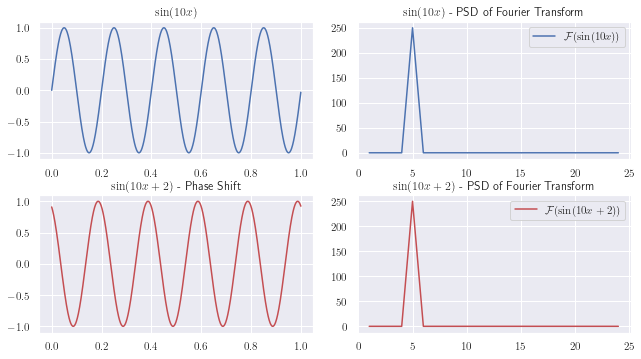

In [83]:
sns.set(font_scale=1)
fig, axs = plt.subplots(2,2, figsize=(9,5))
fig.tight_layout()
sns.lineplot(x=t,y=f1,ax=axs[0,0])
axs.flatten()[0].set_title(r"$\sin(10x)$")
sns.lineplot(x=t,y=f2,ax=axs[1,0], color='r')
axs.flatten()[2].set_title(r"$\sin(10x+2)$ - Phase Shift")
sns.lineplot(x=freq[L],y=PSD1[L].real,label=r"$\mathcal{F}(\sin(10x))$", ax=axs[0,1])
axs.flatten()[1].set_title(r"$\sin(10x)$ - PSD of Fourier Transform")
sns.lineplot(x=freq[L],y=PSD2[L].real,color='r',label=r"$\mathcal{F}(\sin(10x+2))$", ax=axs[1,1])
axs.flatten()[3].set_title(r"$\sin(10x+2)$ - PSD of Fourier Transform")
fig.savefig("../img/fft_phase_shift.png")